## continue

In [3]:
!git clone https://github.com/jasper-zheng/pix2styleGAN3.git

Cloning into 'pix2styleGAN3'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 369 (delta 5), reused 2 (delta 1), pack-reused 356
Receiving objects: 100% (369/369), 952.26 KiB | 6.14 MiB/s, done.
Resolving deltas: 100% (217/217), done.


In [1]:
!pip uninstall jax jaxlib -y
!pip install "jax[cuda11_cudnn805]==0.3.10" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install -r /notebooks/pix2styleGAN3/requirements.txt
!pip install kmeans_pytorch
!pip install kornia

Found existing installation: jax 0.3.14
Uninstalling jax-0.3.14:
  Successfully uninstalled jax-0.3.14
Found existing installation: jaxlib 0.3.8+cuda11.cudnn82
Uninstalling jaxlib-0.3.8+cuda11.cudnn82:
  Successfully uninstalled jaxlib-0.3.8+cuda11.cudnn82
Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.7/939.7 kB 54.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.7/175.7 MB 12.2 MB/s eta 0:00:0000:0100:01
  Created wheel for jax: filename=jax-0.3.10-py3-none-any.whl size=1088051 sha256=c9b03ec85dd205ec32f3119b20debe67f3eb21cd2627c503a0ff027bd5ba3044
  Stored in directory: /root/.cache/pip/wheels/14/4a/ff/e9ddfa09012c67d22f926a7873c546c04e722969e8d86f84ec
Successfully built jax
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 56.4 MB/s eta 0:00:00

In [4]:
%cd /notebooks/

/notebooks


In [1]:
!nvidia-smi

Tue Nov  1 15:29:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:05.0 Off |                    0 |
| N/A   31C    P0    48W / 400W |      0MiB / 81920MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## continue

In [1]:

%cd /notebooks/pix2styleGAN3_canny/






/notebooks/pix2styleGAN3_canny


In [ ]:


!python train.py --outdir=/notebooks/runs/ffhq-512-canny --cfg=pix2stylegan3-r --data=/storage/ffhq-u-512/ffhq-u-512x512.zip --gpus=1 --batch=32 --gamma=8 --cmax=512 --cbase=16384 --batch-gpu=32--snap=20    



In [ ]:
import torch
torch.__version__

'1.12.1+cu113'

##  flask  

In [50]:
%cd /notebooks

/notebooks


In [51]:
!git clone https://github.com/jasper-zheng/realtime-flask-model.git

Cloning into 'realtime-flask-model'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 58 (delta 17), reused 47 (delta 9), pack-reused 0
Unpacking objects: 100% (58/58), 1.48 MiB | 1.64 MiB/s, done.


In [52]:
%cd realtime-flask-model

/notebooks/realtime-flask-model


## canny test

In [ ]:

%cd /notebooks/pix2styleGAN3_canny/


/notebooks/pix2styleGAN3_canny


In [ ]:
import legacy
import dnnlib

import torch
import numpy as np

from torch_utils import misc
from torch_utils.ops import upfirdn2d

device = torch.device('cuda')
network_pkl = '/notebooks/runs/ffhq-512-canny/00013-pix2stylegan3-r-ffhq-u-512x512-gpus1-batch32-gamma8/network-snapshot-002792.pkl'


with dnnlib.util.open_url(network_pkl) as f:
    model = legacy.load_network_pkl(f)
    g_model = model['G'].eval().requires_grad_(False).to(device)
    

In [ ]:
import torch

from torchvision.transforms import ToTensor
from PIL import Image

from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid
from IPython import display

from training.training_loop import Preprocess

op = Preprocess()

convert_tensor = ToTensor()

In [195]:
zs = []
for i in range(4):
    z = np.random.randn(1, 512)
    z = torch.from_numpy(z).to(device)
    zs.append(z)

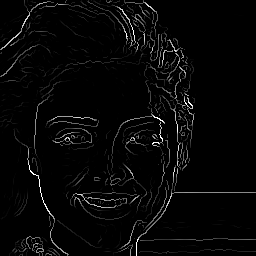

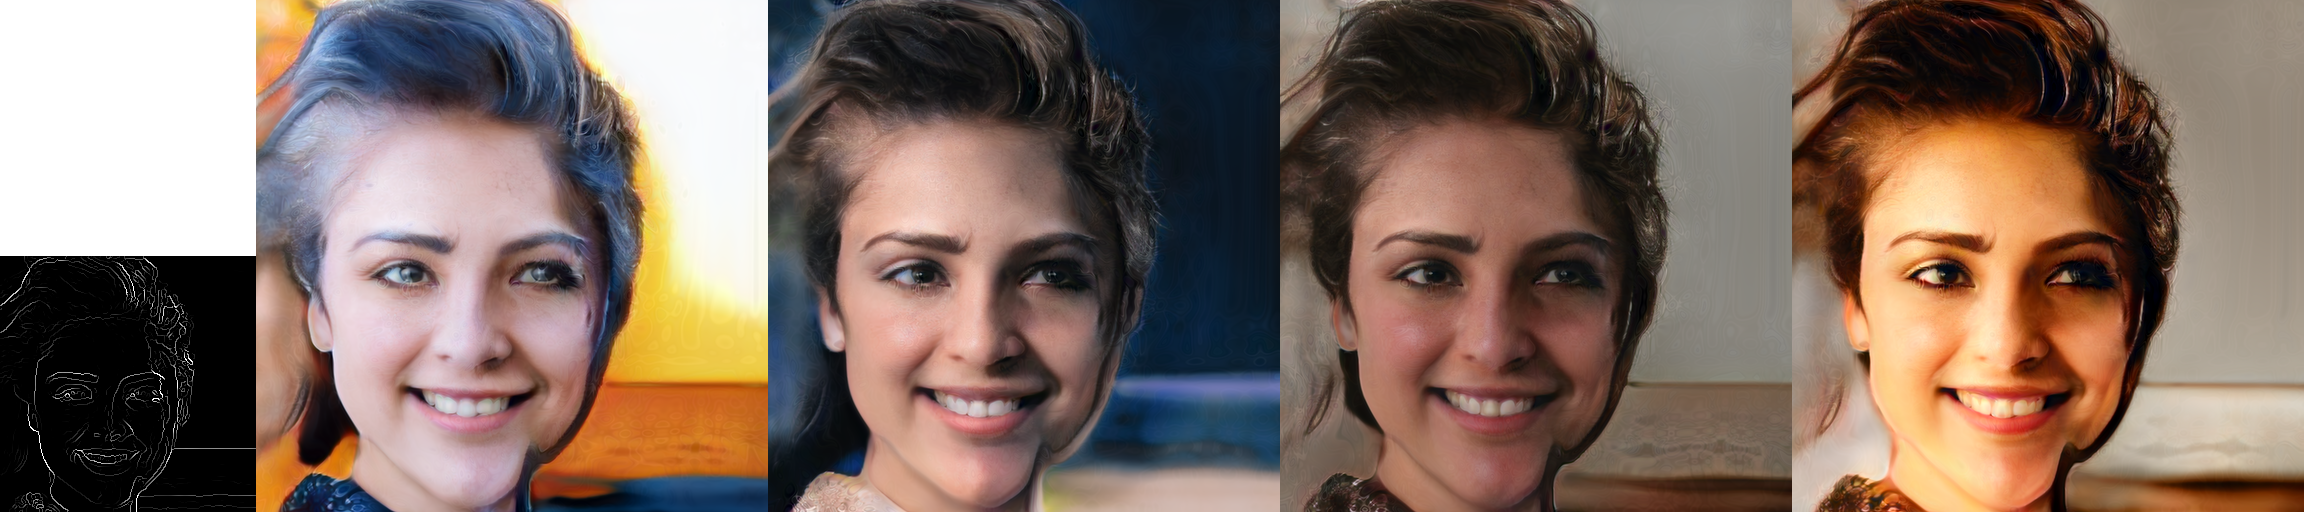

In [226]:
device = torch.device('cuda')
img = Image.open('/notebooks/previews/ffhq256_preview/00000/img00000427.png').convert("RGB")
img_tensor = convert_tensor(img).to(device).unsqueeze(0)*2-1
img_tensor = op.preprocess_to_conditions(img_tensor)
display.display(to_pil_image(img_tensor.add(1).div(2).clamp(0, 1)[0].cpu()))



p = []
for i in range(4):
    p.append(g_model(zs[i], None, img_tensor[:,:1]))

img_tensor_show = img_tensor.repeat([1,3,1,1])
img_tensor_show = torch.cat((torch.ones_like(img_tensor_show).to(device),img_tensor_show),dim=2)
x = torch.cat((img_tensor_show,p[0],p[1],p[2],p[3]),dim=3)

display.display(to_pil_image(x.add(1).div(2).clamp(0, 1)[0].cpu()))

In [186]:
img_tensor.repeat([1,3,1,1]).shape

torch.Size([1, 3, 256, 256])

In [139]:
z2 = z

In [171]:
z = np.random.randn(1, 512)
z = torch.from_numpy(z).to(device)

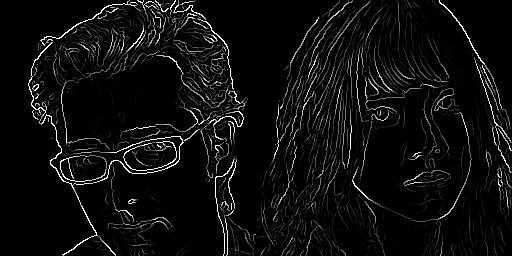

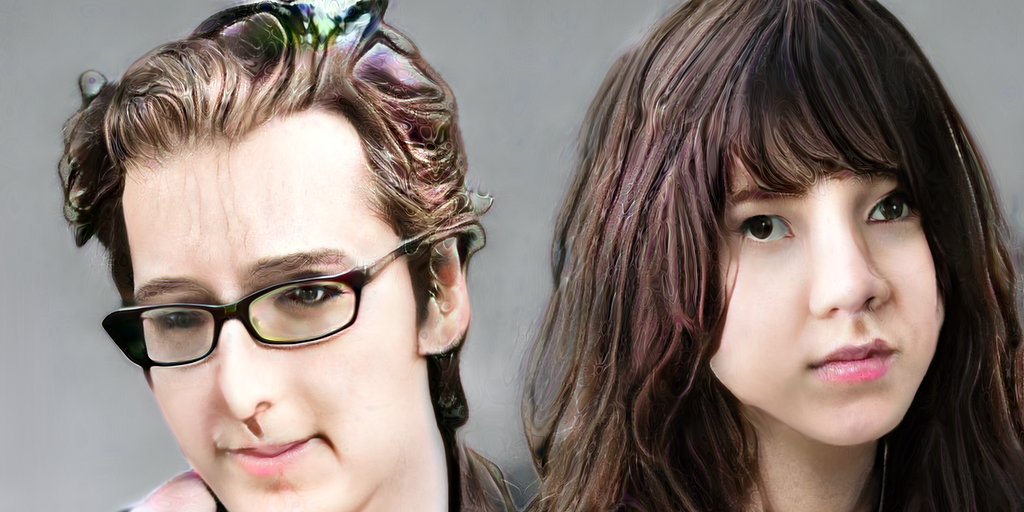

In [ ]:
device = torch.device('cuda')
img = Image.open('/notebooks/40.png').convert("RGB")
img_tensor = convert_tensor(img).to(device).unsqueeze(0)*2-1
display.display(to_pil_image(img_tensor.add(1).div(2).clamp(0, 1)[0].cpu()))

p = g_model(z, None, img_tensor[:,:1])

display.display(to_pil_image(p.add(1).div(2).clamp(0, 1)[0].cpu()))

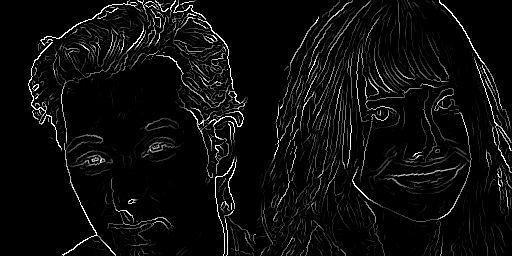

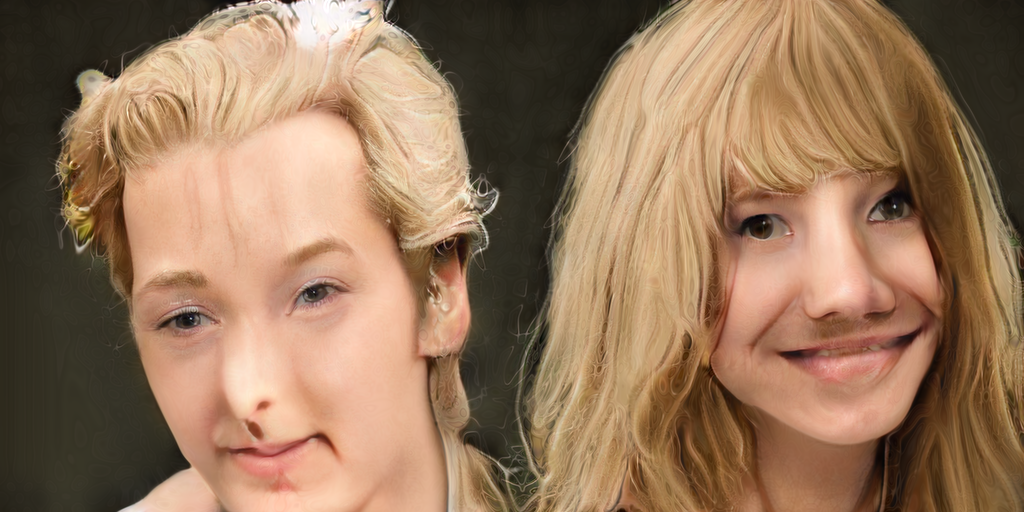

In [130]:
device = torch.device('cuda')
img = Image.open('/notebooks/41.png').convert("RGB")
img_tensor = convert_tensor(img).to(device).unsqueeze(0)*2-1
display.display(to_pil_image(img_tensor.add(1).div(2).clamp(0, 1)[0].cpu()))

p = g_model(z, None, img_tensor[:,:1])

display.display(to_pil_image(p.add(1).div(2).clamp(0, 1)[0].cpu()))